# Pengenalan Aruco Marker/ArTag

## Kompetensi

Mahasiswa mampu membuat, memindai, dan mengestrak informasi dari Aruco Marker/AR Tag dengan library OpenCV

## Sub Kompetensi

•	Dapat melakukan pemrograman dengan Jupyter Notebook.

•	Dapat melakukan pemrograman membuat Aruco Marker.

•	Dapat melakukan ekstrasi informasi pada Aruco Marker.

## Dasar Teori

### a. Python

**Python** adalah bahasa pemrograman interpretatif multiguna. Tidak seperti bahasa lain yang susah untuk dibaca dan dipahami, Python lebih menekankan pada keterbacaan kode agar lebih mudah untuk memahami sintaks. Hal ini membuat Python sangat mudah dipelajari baik untuk pemula maupun untuk yang sudah menguasai bahasa pemrograman lain.
Bahasa ini muncul pertama kali pada tahun 1991, dirancang oleh seorang bernama Guido van Rossum. Sampai saat ini Python masih dikembangkan oleh Python Software Foundation. Bahasa Python mendukung hampir semua sistem operasi, bahkan untuk sistem operasi Linux, hampir semua distronya sudah menyertakan Python di dalamnya.
Dengan kode yang simpel dan mudah diimplementasikan, seorang programmer dapat lebih mengutamakan pengembangan aplikasi yang dibuat, bukan malah sibuk mencari syntax error.


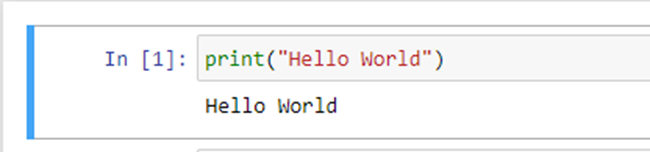

Hanya dengan menuliskan kode print seperti yang diatas, anda sudah bisa mencetak apapun yang anda inginkan di dalam tanda kurung (). Dibagian akhir kode pun, anda tidak harus mengakhirnya dengan tanda semicolon (;).

### b. Jupyter Notebook

**Jupyter Notebook** adalah aplikasi web gratis untuk yang digunakan untuk membuat dan membagikan dokumen yang memiliki kode, hasil hitungan, visualisasi, dan teks. Jupyter adalah singkatan dari tiga bahasa pemrograman Julia (Ju), Python (Py), dan R. Tiga bahasa pemrograman ini adalah sesuatu yang penting bagi seorang data scientist.

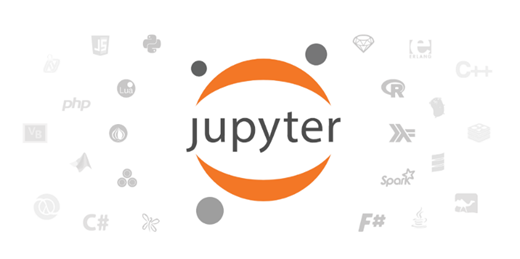

Jupyter berfungsi untuk membantu dalam membuat narasi komputasi yang menjelaskan makna dari data di dalamnya dan memberikan insight mengenai data tersebut. Selain itu, Jupyter juga mempermudah kerja sama antara insinyur dan data scientist karena kemudahannya dalam menulis dan berbagi teks dan kode.

### c. OpenCV 

**OpenCV-contrib** adalah library/packages khusus dalam bahasa pemrograman Python, yang secara eksklusif diperlukan untuk sistem untuk menjalankan deskripsi fitur SURF di samping modul OpenCV di library open-source.
OpenCV-contrib sama dengan librabry OpenCV pada umumnya yang fungsi utamnya untuk memanipluasi frame gambar/video lebih sering disebut Computer Vision, namun untuk library tersebut terdapat penambahan feature-feature. Nantinya feature-feature tersebut digunakan pada labsheet-labsheet selanjutnya tentang Aruco Marker.


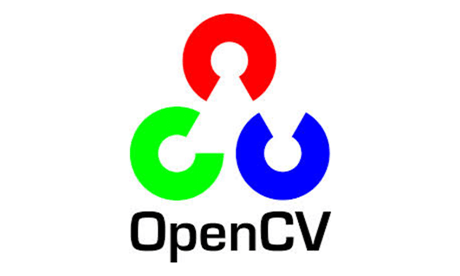

### d. Aruco Marker / ArTag

**Aruco Marker/ ArTag** adalah marker kotak sintetik yang disusun oleh garis tepi hitam lebar dan matriks biner bagian dalam yang menentukan   pengidentifikasi (id). Perbatasan   hitam memfasilitasi deteksi cepat dalam gambar dan kodifikasi biner memungkinkan identifikasi dan penerapan teknik deteksi kesalahan dan koreksi. Ukuran marker menentukan ukuran matriks internal. Misalnya ukuran marker 4x4 terdiri dari 16 bit. Manfaat utama mereka adalah deteksi mereka kuat, cepat dan sederhana. Modul ArUco mencakup deteksi jenis penanda ini dan alat untuk menggunakannya untuk pose estimation dan kalibrasi kamera. Untuk fungsinya dapat digunakan untuk pengenalan objek dalam misi pendaratan dan pembacaan jarak dengan menggunakan library ArUco Marker yang  terdapat pada OpenCV, sehingga  didapatkan  sumbu  x,  y  dan  z  dari Markers.

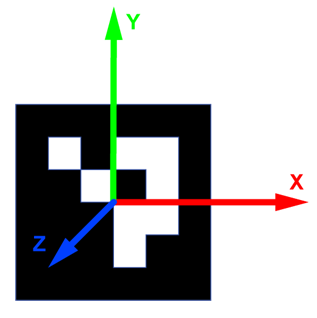

## Langkah-Langkah Pemrograman

### Import Library

In [2]:
import cv2 as cv
import cv2.aruco as aruco
import numpy as np

### Generating Aruco Marker

In [ ]:
# Load the predefined dictionary
dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_6X6_250)

# Generate the marker
markerImage = np.zeros((200, 200), dtype=np.uint8)
markerImage = cv.aruco.drawMarker(dictionary, 33, 200, markerImage, 1);

cv.imwrite("marker33.png", markerImage);

### Deteksi Aruco Marker / Ar Tag

In [ ]:
def findArucoMarkers(img, markerSize = 4, totalMarkers=250, draw=True):
    gray = cv.cvtColor(img, cv2.COLOR_BGR2GRAY)
    key = getattr(aruco, f'DICT_{markerSize}X{markerSize}_{totalMarkers}')
    arucoDict = aruco.Dictionary_get(key)
    arucoParam = aruco.DetectorParameters_create()
    bboxs, ids, rejected = aruco.detectMarkers(gray, arucoDict, parameters = arucoParam)
    print(ids)
    if draw:
        aruco.drawDetectedMarkers(img, bboxs) 
        
cap = cv.VideoCapture(0)
while True:
    success, img = cap.read()
    findArucoMarkers(img)
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()